In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import lasio as la
import seaborn as sns
import bruges as br

%matplotlib inline

# Define a default font for the figures
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 12
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

# Initialize Plotly and Cufflinks
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [30]:
K_a=0.000131 # bulk modulus of air

K_ca=71  
G_ca=30       # chalk
Rho_ca=2.71

K_w=2.2
G_w=0         # water
Rho_w=1.0

Por=np.linspace(0,1,101)
        
Rho=Rho_ca*(1-Por)+Por*Rho_w



In [175]:

K_sus = np.nan*np.ones((Por.size,11))
K_out = np.nan*np.ones((Por.size,11))
G_out = np.nan*np.ones((Por.size,11))
M_out = np.nan*np.ones((Por.size,11))
Vp_out = np.nan*np.ones((Por.size,11))
Vs_out = np.nan*np.ones((Por.size,11))

n=0;
for IF in np.arange(0,1.1,0.1):
    f1=IF*(1-Por)
    f2=Por+(1-IF)*(1-Por)
        
    K_sus[:,n] = (Por/K_w+(1-Por)*(1-IF)/K_ca)**(-1) * (Por + (1-IF)*(1-Por))

    K=K_ca+f2/((K_sus[:,n]-K_ca)**(-1)+f1*(K_ca+4/3*G_ca)**(-1))
    G=G_ca+ f2/(2*f1*(K_ca+2*G_ca)/(5*G_ca*(K_ca+4/3*G_ca))-1/G_ca)

    M=K+4/3*G
    Vp_out[:,n]=(M/Rho)**0.5
    Vs_out[:,n]=(G/Rho)**0.5

    M_out[:,n]=M 
    G_out[:,n]=G
    K_out[:,n]=K

    n=n+1
    
    


C:\Users\kenb\Python_Anaconda\envs\obspy\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\kenb\Python_Anaconda\envs\obspy\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\kenb\Python_Anaconda\envs\obspy\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in multiply



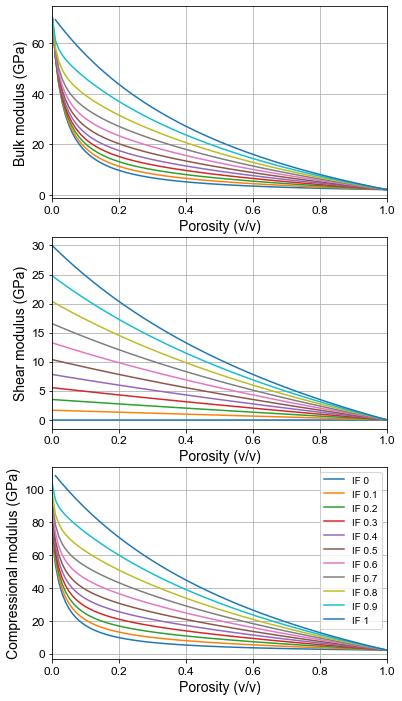

In [176]:
#   Create the plot figure
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(6, 12))
fig.set_facecolor('white')

#   Plot log curves in two-way time
ax[0].plot(Por,K_out)
ax[0].set_xlim(0, 1.0)
ax[0].set_ylabel('Bulk modulus (GPa)', fontsize = 14)
ax[0].set_xlabel('Porosity (v/v)', fontsize = 14)
ax[0].grid()

ax[1].plot(Por,G_out)
ax[1].set_xlim(0, 1.0)
ax[1].set_ylabel('Shear modulus (GPa)', fontsize = 14)
ax[1].set_xlabel('Porosity (v/v)', fontsize = 14)
ax[1].grid()

ax[2].plot(Por,M_out)
ax[2].set_xlim(0, 1.0)
ax[2].set_ylabel('Compressional modulus (GPa)', fontsize = 14)
ax[2].set_xlabel('Porosity (v/v)', fontsize = 14)
ax[2].grid()

plt.legend(['IF 0','IF 0.1','IF 0.2','IF 0.3','IF 0.4','IF 0.5','IF 0.6','IF 0.7','IF 0.8','IF 0.9','IF 1'])
plt.show()

